# Machine Learning 2022
## Lab. 6 - Clustering
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 12.04.2022

### Grupa: wtorek 9:30 - 11:00


### K-means clustering - example I

Ex. 1 - Analyse of the function parameters and generated output.

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex. 2 - Generating of sample data sets

In [18]:
X, y = make_blobs(n_samples=120, n_features=2, centers= 4, cluster_std=0.4, random_state=33)


Ex. 3 - Xs and Ys shape

In [19]:
X.shape

(120, 2)

In [20]:
y.shape

(120,)

Ex. 4 - plotting sample data

In [21]:
data = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1))
X0 = data[data[2] == 0]
X1 = data[data[2] == 1]
X2 = data[data[2] == 2]
X3 = data[data[2] == 3]

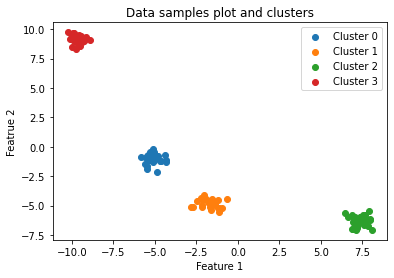

In [22]:
plt.scatter(x =X0[0], y=X0[1])
plt.scatter(x =X1[0], y=X1[1])
plt.scatter(x =X2[0], y=X2[1])
plt.scatter(x =X3[0], y=X3[1])
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('Feature 1')
plt.ylabel('Featrue 2')
plt.title("Data samples plot and clusters")
plt.show()

Ex. 5 - K-Means model

In [24]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_pred = kmeans.predict(X)

Ex. 6 K-means results plot

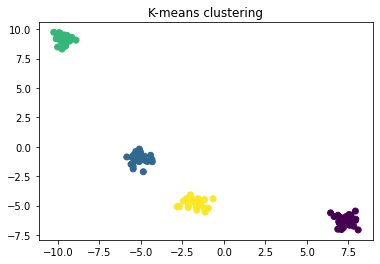

In [25]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("K-means clustering")
plt.show()


Ex. 7 - Inertia calculation

In [26]:
print(f"Kmeans inertia = {kmeans.inertia_:.4f}")

Kmeans inertia = 37.0204


### K-means clustering - example II

In [27]:
X, y = make_blobs(n_samples=120, n_features=2, centers= 5, cluster_std=0.8, random_state=33)
data = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1))





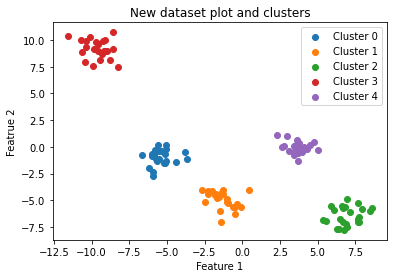

In [28]:
for i in range(5):
    plt.scatter(x=data[data[2] == i][0], y=data[data[2] == i][1])
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.xlabel('Feature 1')
plt.ylabel('Featrue 2')
plt.title("New dataset plot and clusters")
plt.show()

Ex. 2 - 5 clusters

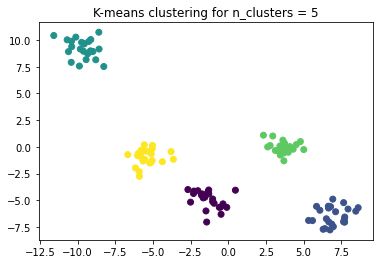

In [37]:
kmeans5 = KMeans(n_clusters=5)

kmeans5.fit(X)

y_pred5 = kmeans5.predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred5)
plt.title("K-means clustering for n_clusters = 5")
plt.show()


Ex. 3.

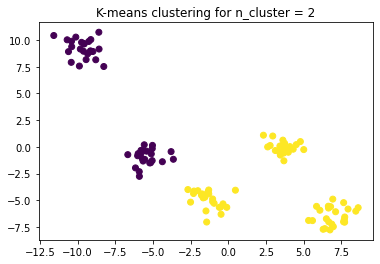

In [38]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)

y_pred2 = kmeans2.predict(X)


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)
plt.title("K-means clustering for n_cluster = 2")
plt.show()

Ex. 4.

In [39]:
print(f"Inetria - 5 clusters: {kmeans5.inertia_}")
print(f"Inetria - 2 clusters: {kmeans2.inertia_}")

Inetria - 5 clusters: 133.85579507612513
Inetria - 2 clusters: 2955.7871855559983


### K-means ++

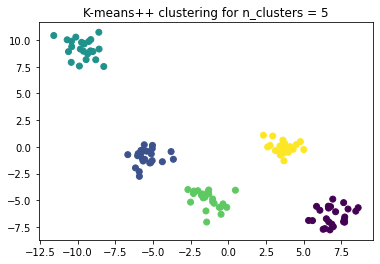

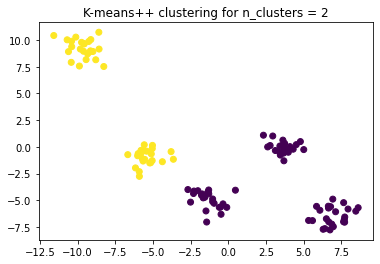

In [43]:
kmeans5_pp = KMeans(n_clusters=5, random_state=33, init='k-means++')
kmeans5_pp.fit(X)

y_pred5_pp = kmeans5_pp.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred5_pp)
plt.title("K-means++ clustering for n_clusters = 5")
plt.show()

kmeans2_pp = KMeans(n_clusters=2, random_state=33, init='k-means++')
kmeans2_pp.fit(X)

y_pred2_pp = kmeans2_pp.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2_pp)
plt.title("K-means++ clustering for n_clusters = 2")
plt.show()


In [44]:
print(f"Inetria - 5 clusters: {kmeans5_pp.inertia_}")
print(f"Inetria - 2 clusters: {kmeans2_pp.inertia_}")

Inetria - 5 clusters: 133.85579507612513
Inetria - 2 clusters: 2955.7871855559983


### Elbow method

Ex. 1

In [47]:
from sklearn.datasets import make_moons
import seaborn as sns

X, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(X, columns = ['f1','f2'])

scores_inertia = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X_moon)
    scores_inertia.append(kmeans.inertia_)

Ex.2.

Text(0, 0.5, 'Inertia')

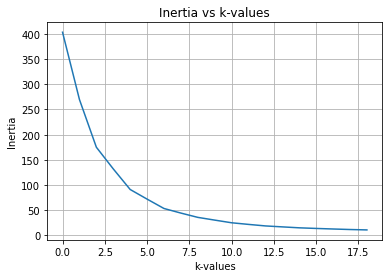

In [48]:
plt.plot(scores_inertia)
plt.title("Inertia vs k-values")
plt.grid(True)
plt.xlabel("k-values")
plt.ylabel("Inertia")

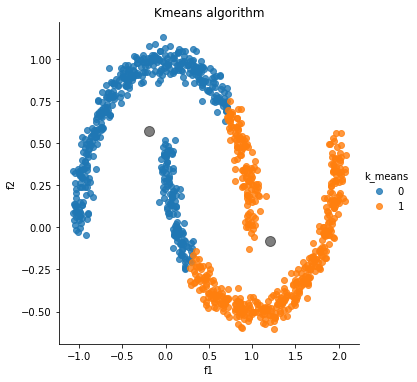

In [49]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
kmeans.fit(X_moon)
y_kmeans = kmeans.predict(X_moon)
    
centers = kmeans.cluster_centers_
X_moon['k_means'] = y_kmeans
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue='k_means').set(title='K-means algorithm')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

### Clustering II - hierarchical methods
### Dendrograms
Ex.1. - data plot

In [51]:
X, y = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

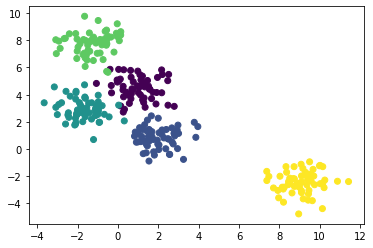

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Ex. 2. Kmeans for n_clusters = 2

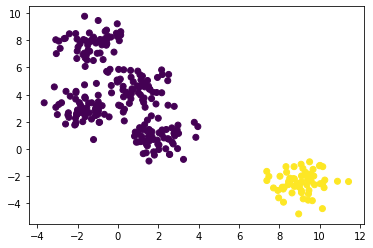

In [54]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

Ex. 3 - dendrogram plot

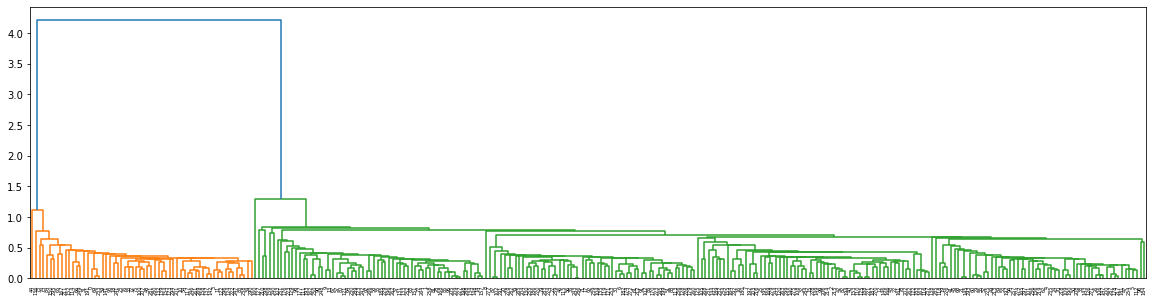

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X)
plt.figure(figsize=(20, 5))
dn = dendrogram(Z)
plt.show()


Ex. 4 - dendrogram for smaller dataset

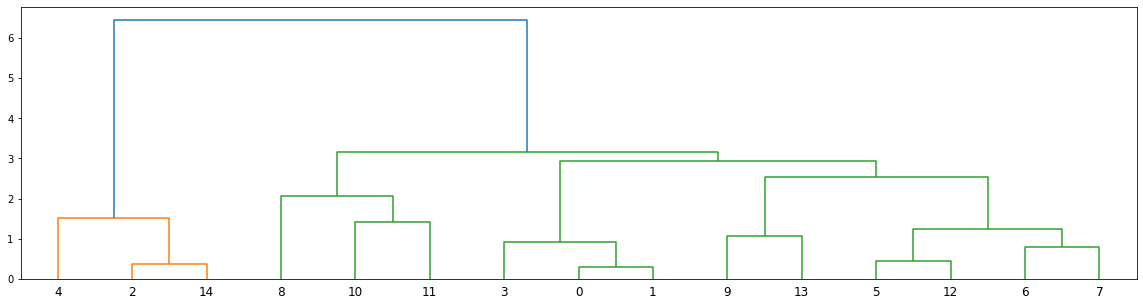

In [56]:
X, y = make_blobs(n_samples=15,centers=5, cluster_std=0.8, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++')
kmeans.fit(X)

Z = linkage(X)
plt.figure(figsize=(20, 5))
dn = dendrogram(Z)
plt.show()

## Agglomerative clustering

In [57]:
df = pd.read_csv("shopping_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Ex. 6 - dendrogram 

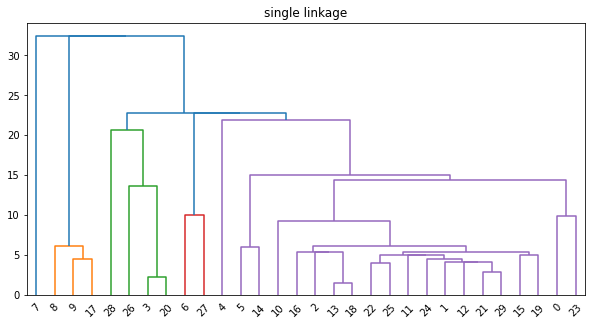

In [63]:
plt.figure(figsize=(10, 5))
Z = linkage(data.sample(n=30), method='single')
dendrogram(Z)
plt.title("single linkage")
plt.show()

Ex.7 - different linkage values

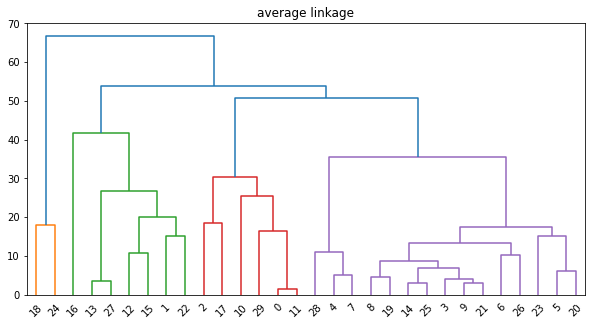

In [64]:
plt.figure(figsize=(10, 5))
Z = linkage(data.sample(n=30), method='average')
dendrogram(Z)
plt.title("average linkage")
plt.show()

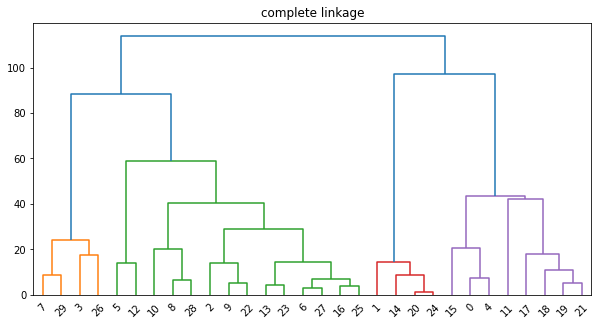

In [65]:
plt.figure(figsize=(10, 5))
Z = linkage(data.sample(n=30), method='complete')
dendrogram(Z)
plt.title("complete linkage")
plt.show()

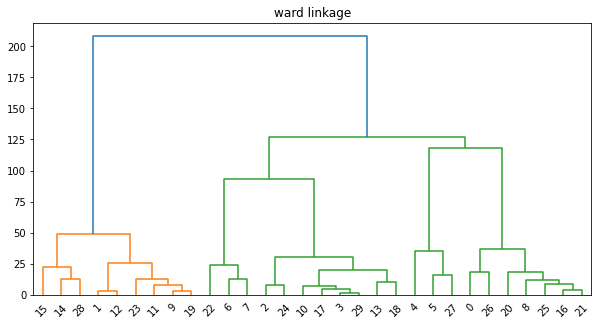

In [66]:
plt.figure(figsize=(10, 5))
Z = linkage(data.sample(n=30), method='ward')
dendrogram(Z)
plt.title("ward linkage")
plt.show()

Ex. 8

In [74]:
from sklearn.cluster import AgglomerativeClustering

k = 7
model_single = AgglomerativeClustering(k, linkage="single")
single = model_single.fit_predict(data)

model_average = AgglomerativeClustering(k, linkage="average")
average = model_average.fit_predict(data)

model_complete = AgglomerativeClustering(k, linkage="complete")
complete= model_complete.fit_predict(data)

model_ward = AgglomerativeClustering(k, linkage="ward")
ward = model_ward.fit_predict(data)

Ex. 9

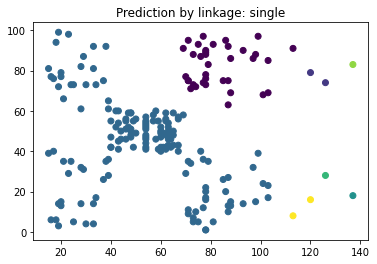

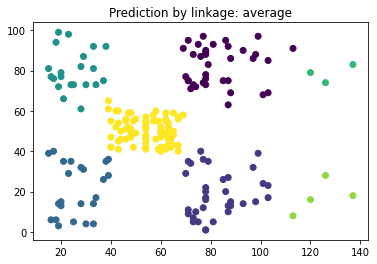

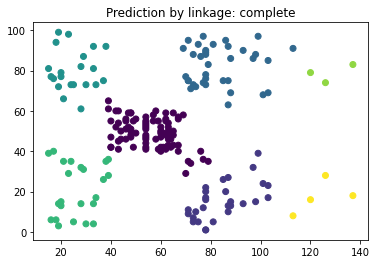

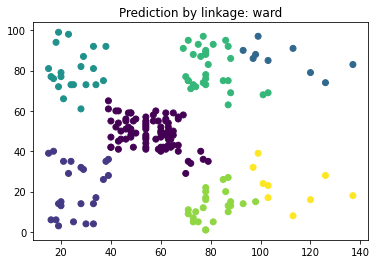

In [75]:
X = np.array(data)

linkage_tab = ['single', 'average', 'complete', 'ward']
linkage_pred = [single, average, complete, ward]
for i, linkage_type in enumerate(linkage_tab): 
    plt.scatter(x=X[:,0], y=X[:, 1], c=linkage_pred[i])
    plt.title(f"Prediction by linkage: {linkage_type}")
    plt.show()

### Selecting the number of clusters with silhouette analysis on KMeans clustering

Ex.1 

In [81]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

Ex. 2

In [82]:
n_clusters = list(range(2, 6))

Ex. 3

Inspiration for realization of ex.3 from:

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


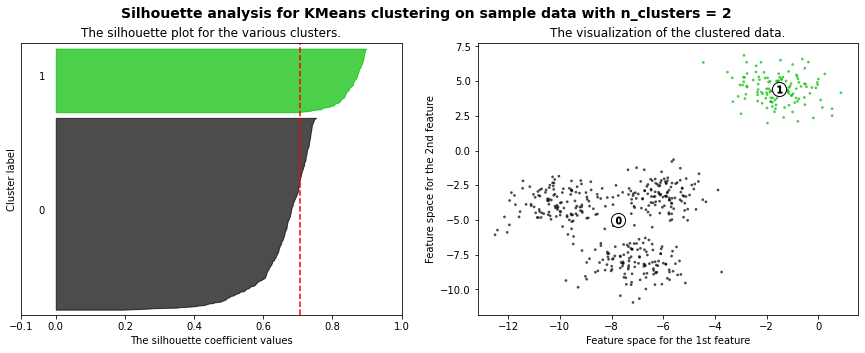

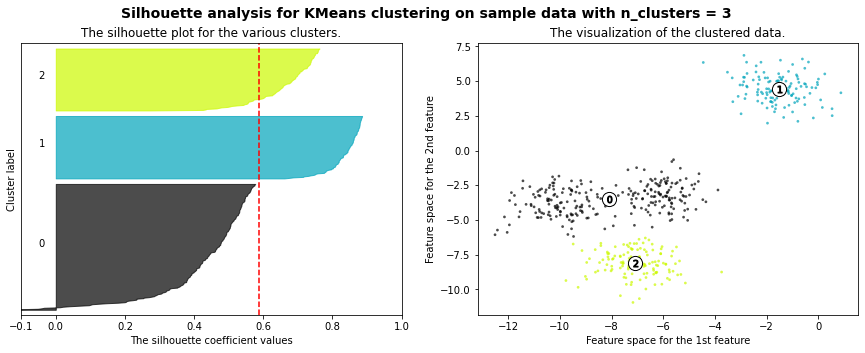

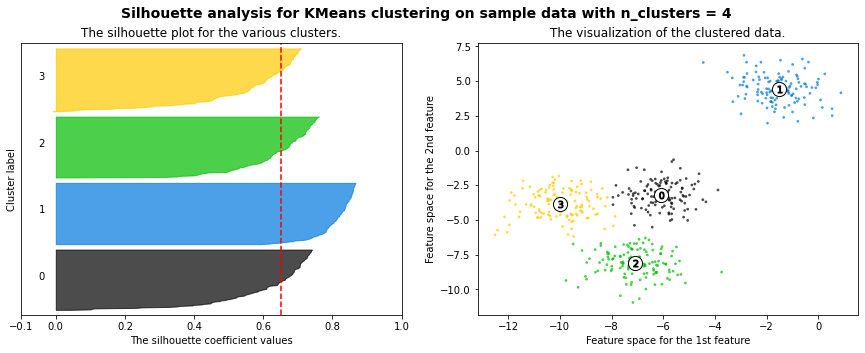

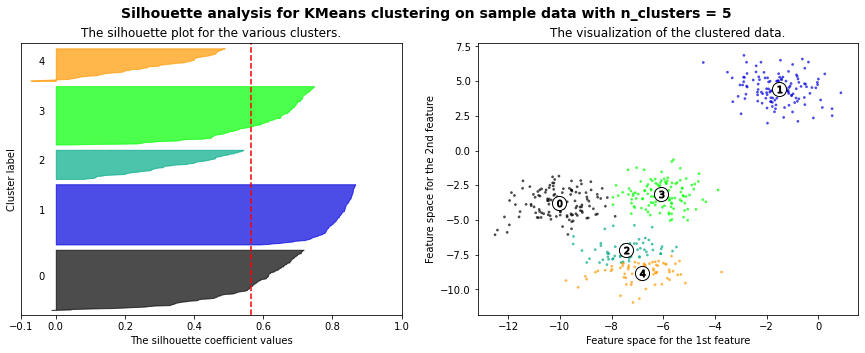

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n + 1) * 10])
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",n,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

Conclusion: We received the best result for k = 4. In that case every diagram pass the red vertical line and have similar thickness.

### DBSCAN algorithm

In [87]:
from sklearn import  datasets
from sklearn.cluster import DBSCAN
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

Ex. 1 - compare plots 

In [97]:
def plots_comparing(data, n_clusters,eps=0.4):
    Kmean_m = KMeans(n_clusters=n_clusters).fit(data)
    agglomerative_cl = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    DBSCAN_m= DBSCAN(eps=eps).fit(data)

    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches((24,6))
    
    ax[0].scatter(data[:,0], data[:,1], c=Kmean_m.labels_)
    ax[1].scatter(data[:,0], data[:,1], c=agglomerative_cl.labels_)
    ax[2].scatter(data[:,0], data[:,1], c=DBSCAN_m.labels_)
    ax[0].set_title("Kmeans")
    ax[1].set_title("Agglomerative")
    ax[2].set_title("DBSCAN")

Noisy_circles

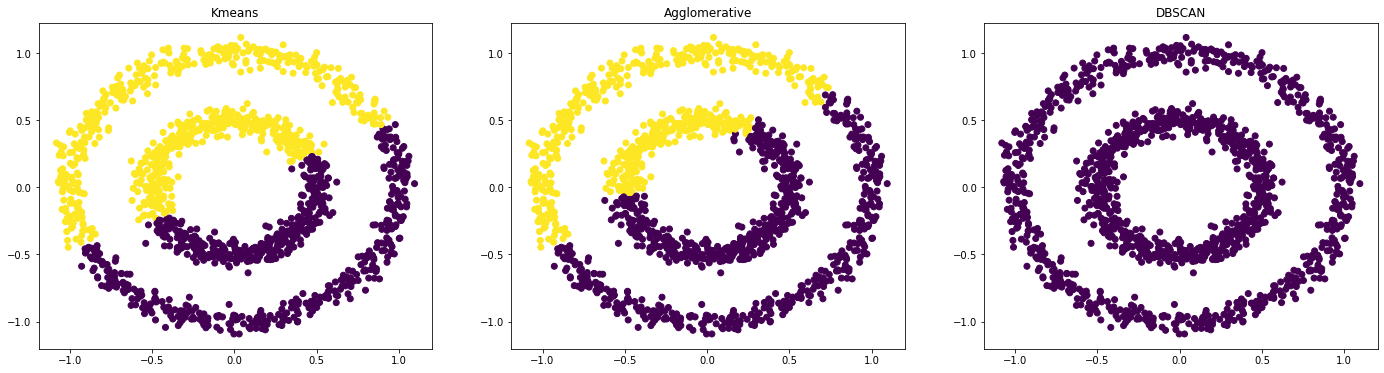

In [98]:
plots_comparing(noisy_circles[0],2)

Noisy_moons

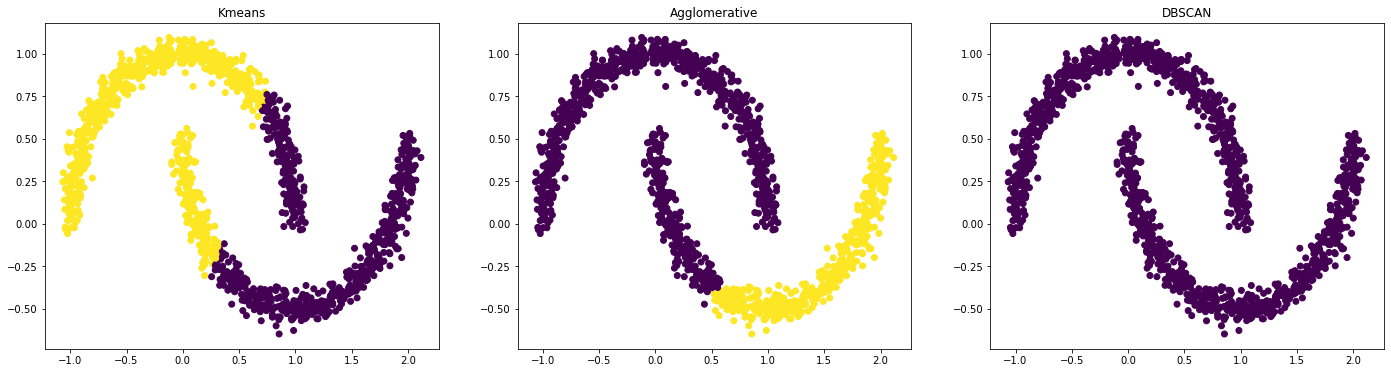

In [99]:
plots_comparing(noisy_moons[0],2)

No structure

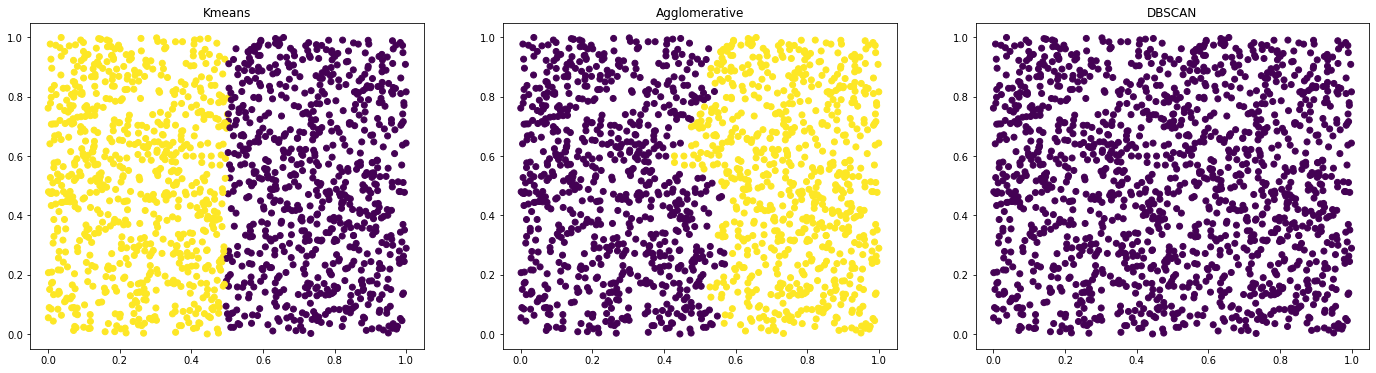

In [100]:
plots_comparing(no_structure[0],2)

Blobs

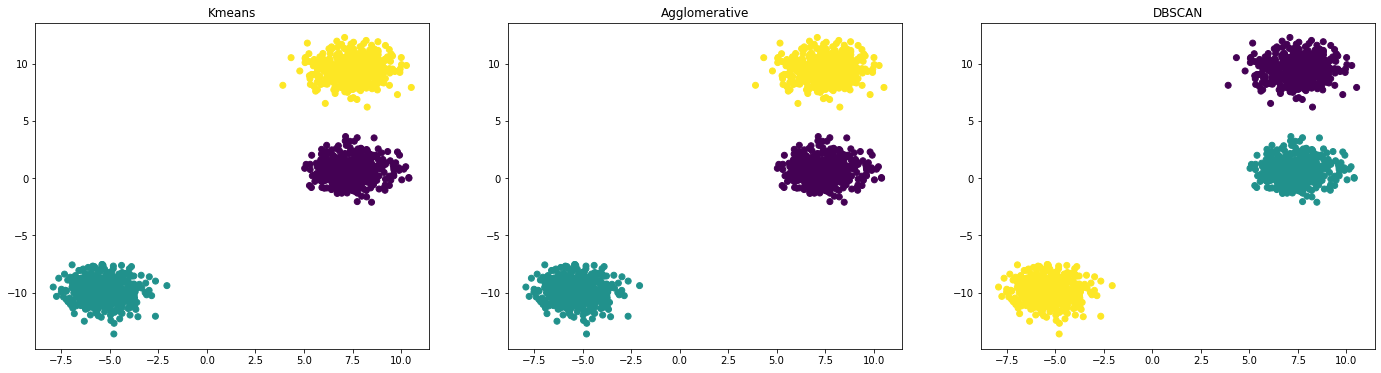

In [105]:
plots_comparing(blobs[0],3,1.5)

Aniso

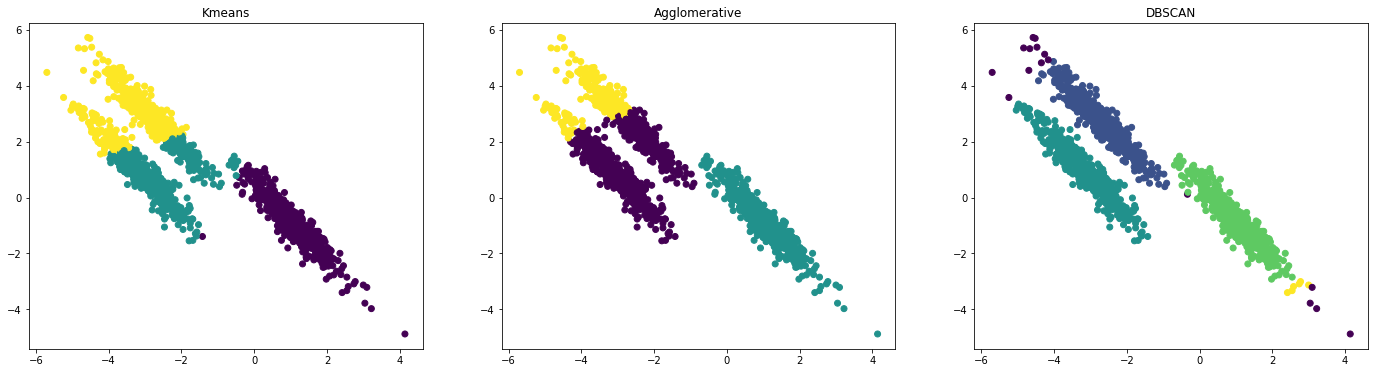

In [107]:
plots_comparing(aniso[0],3,.3)

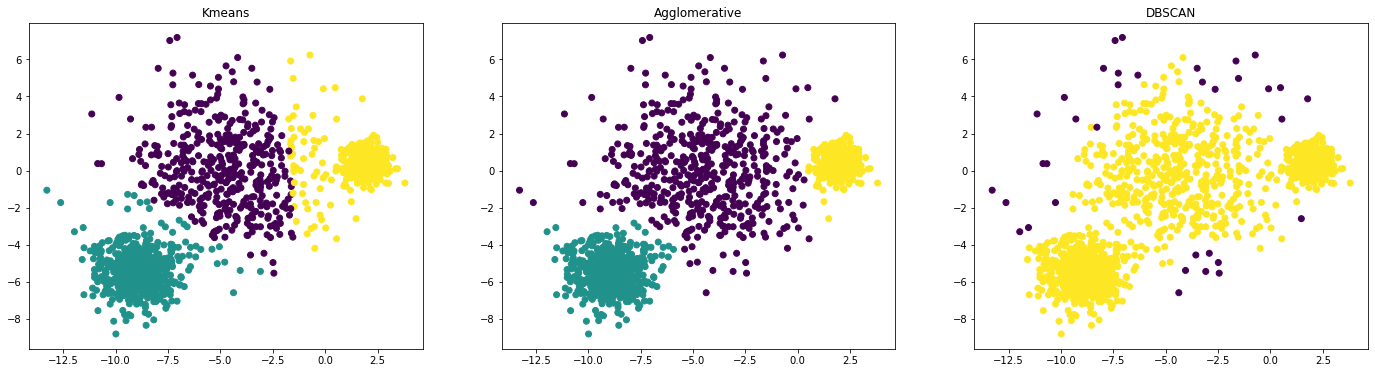

In [111]:
plots_comparing(varied[0],3,.9)